# Imports

In [162]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
# Load MNIST dataset
(x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = (
    keras.datasets.mnist.load_data()
)

In [ ]:
# Normalize pixel values to [0, 1]
x_train_origin = x_train_origin.astype("float32") / 255.0
x_test_origin = x_test_origin.astype("float32") / 255.0

# Print shapes for confirmation
print(f"x_train_origin shape: {x_train_origin.shape}")
print(f"y_train_origin shape: {y_train_origin.shape}")

x_train_origin shape: (60000, 28, 28)
y_train_origin shape: (60000,)


In [79]:
from sklearn.model_selection import train_test_split

training_samples = 5000

train_data, val_data, train_targets, val_targets = train_test_split(
    x_train_origin[:training_samples],
    y_train_origin[:training_samples],
    test_size=0.2,
    random_state=42,
)

# Flatten the image data from 2D (28x28) to 1D (784) since Dense layers expect flat input
train_data_flat = train_data.reshape(train_data.shape[0], -1)
val_data_flat = val_data.reshape(val_data.shape[0], -1)

In [ ]:
# Display the image using matplotlib
import matplotlib.pyplot as plt

image = train_data[1].reshape(28, 28)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

Prepare model

Epoch 1/20
125/125 [==============================] - 1s 2ms/step - loss: 2.3343 - accuracy: 0.4672 - val_loss: 1.9259 - val_accuracy: 0.7720
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 1.4387 - accuracy: 0.7818 - val_loss: 1.2343 - val_accuracy: 0.8710
Epoch 3/20
125/125 [==============================] - 0s 1ms/step - loss: 1.0872 - accuracy: 0.8695 - val_loss: 0.9812 - val_accuracy: 0.8960
Epoch 4/20
125/125 [==============================] - 0s 1ms/step - loss: 0.9206 - accuracy: 0.8923 - val_loss: 0.8509 - val_accuracy: 0.8990
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.8232 - accuracy: 0.9035 - val_loss: 0.8042 - val_accuracy: 0.9050
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.7572 - accuracy: 0.9107 - val_loss: 0.7722 - val_accuracy: 0.8990
Epoch 7/20
125/125 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.9145 - val_loss: 0.7085 - val_accuracy: 0.9150
Epoch 

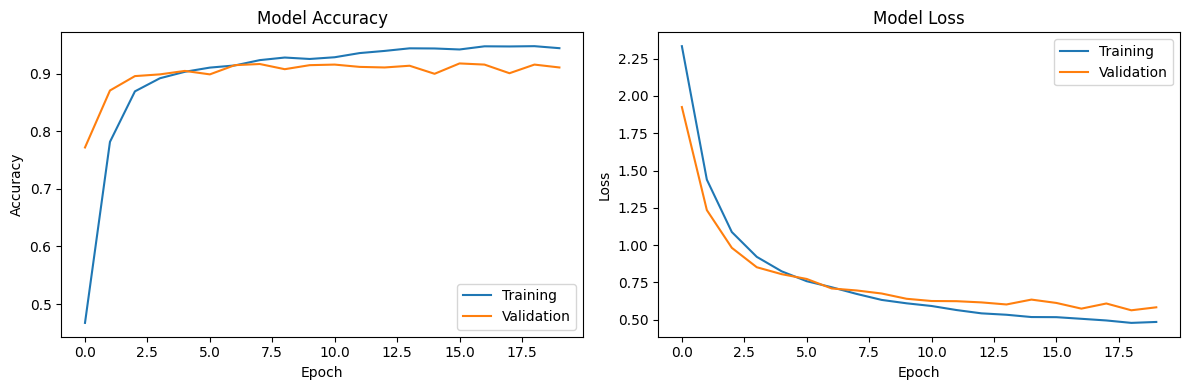

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L2

network_1 = models.Sequential(
    [
        InputLayer(input_shape=(28 * 28,)),
        Dense(32, activation="relu", kernel_regularizer=L2(0.01)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation="relu", kernel_regularizer=L2(0.01)),
        Dense(10, activation="softmax", kernel_regularizer=L2(0.01)),
    ]
)

# Compile
network_1.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train
history = network_1.fit(
    train_data_flat,
    train_targets,
    epochs=20,
    batch_size=32,
    validation_data=(val_data_flat, val_targets),
)

# Print final training and validation metrics
print("\nFinal Results:")
print("-" * 50)
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print("-" * 50)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/20
125/125 [==============================] - 1s 6ms/step - loss: 1.1894 - accuracy: 0.6085 - val_loss: 0.3073 - val_accuracy: 0.9310
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4902 - accuracy: 0.8465 - val_loss: 0.1788 - val_accuracy: 0.9550
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.3624 - accuracy: 0.8842 - val_loss: 0.1409 - val_accuracy: 0.9590
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2852 - accuracy: 0.9112 - val_loss: 0.1236 - val_accuracy: 0.9590
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2248 - accuracy: 0.9340 - val_loss: 0.1181 - val_accuracy: 0.9610
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2137 - accuracy: 0.9320 - val_loss: 0.1223 - val_accuracy: 0.9590
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.1781 - accuracy: 0.9425 - val_loss: 0.1177 - val_accuracy: 0.9620
Epoch

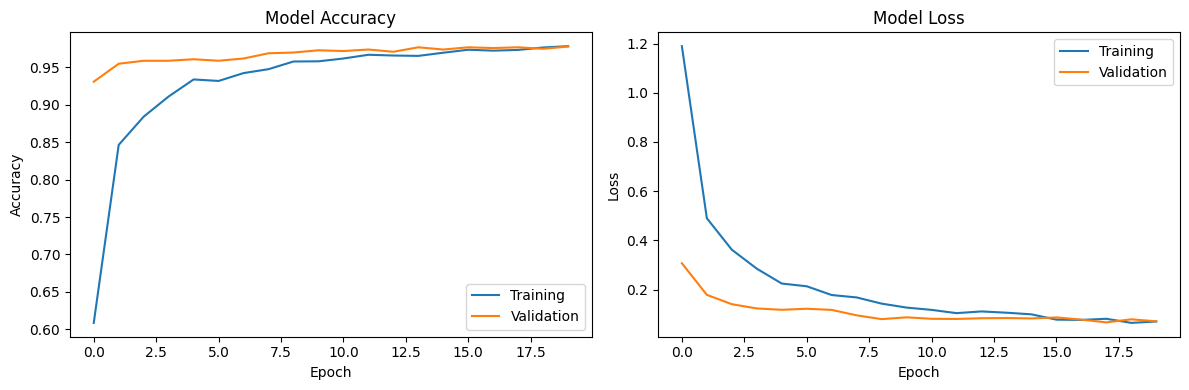

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Reshape,
)

"""
L2 regularization:
- Adds penalty term to loss function
- Prevents large weights
- Reduces overfitting by limiting model complexity

Values:
- Low (0.01): Slower learning, lighter regularization
- High (0.1): May prevent learning by forcing weights near zero

Dropout: Randomly "drops" neurons during training. 0.9 drops 90% (very aggressive),
while 0.1 drops 10% (mild regularization).

BatchNormalization: Normalizes the activations of each layer, making training more stable
and allowing higher learning rates by reducing internal covariate shift
"""
network_cnn = Sequential(
    [
        Reshape((28, 28, 1), input_shape=(28 * 28,)),
        Conv2D(32, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Conv2D(64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="softmax"),
    ]
)

# Compile
network_cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train
history = network_cnn.fit(
    train_data_flat,
    train_targets,
    epochs=20,
    batch_size=32,
    validation_data=(val_data_flat, val_targets),
)
# Print final training and validation metrics
print("\nFinal Results:")
print("-" * 50)
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print("-" * 50)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [165]:
network_cnn.summary()
network_1.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)            

In [166]:
test_images = 5000
x_test = np.copy(x_test_origin[:test_images])
y_test = y_test_origin[:test_images]
# Flatten the test data for prediction
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Get predictions for both networks
predictions_1 = network_1.predict(x_test_flat)
predictions_2 = network_cnn.predict(x_test_flat)

# Convert predictions from one-hot encoded to class labels
predicted_classes_1 = np.argmax(predictions_1, axis=1)
predicted_classes_2 = np.argmax(predictions_2, axis=1)

# Calculate accuracy for each digit for both networks
print("Results for Network 1:")
print("-" * 50)
for digit in range(10):
    # Get indices where true label is the current digit
    digit_indices = np.where(y_test == digit)[0]

    if len(digit_indices) > 0:
        # Calculate accuracy for this digit
        digit_accuracy = np.mean(
            predicted_classes_1[digit_indices] == y_test[digit_indices]
        )
        digit_count = len(digit_indices)
        correct_predictions = int(digit_accuracy * digit_count)

        print(
            f"Digit {digit}, samples: {digit_count}, Correct: {correct_predictions}, Accuracy: {digit_accuracy:.4f}"
        )

# Calculate overall accuracy for network 1
overall_accuracy_1 = np.mean(predicted_classes_1 == y_test)
print(f"Overall Test Accuracy Network 1: {overall_accuracy_1:.4f}")

print("\nResults for Network 2:")
print("-" * 50)
for digit in range(10):
    # Get indices where true label is the current digit
    digit_indices = np.where(y_test == digit)[0]

    if len(digit_indices) > 0:
        # Calculate accuracy for this digit
        digit_accuracy = np.mean(
            predicted_classes_2[digit_indices] == y_test[digit_indices]
        )
        digit_count = len(digit_indices)
        correct_predictions = int(digit_accuracy * digit_count)

        print(
            f"Digit {digit}, samples: {digit_count}, Correct: {correct_predictions}, Accuracy: {digit_accuracy:.4f}"
        )

# Calculate overall accuracy for network 2
overall_accuracy_2 = np.mean(predicted_classes_2 == y_test)
print(f"Overall Test Accuracy Network 2: {overall_accuracy_2:.4f}")

# Plot some example predictions from both networks
plt.figure(figsize=(12, 4))
num_examples = 5

# Get random indices
random_indices = np.random.choice(len(x_test), num_examples, replace=False)

for i, idx in enumerate(random_indices):
    # Network 1 predictions
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"Net1 Pred: {predicted_classes_1[idx]}\nTrue: {y_test[idx]}")
    plt.axis("off")

    # Network 2 predictions
    plt.subplot(2, 5, i + 6)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"Net2 Pred: {predicted_classes_2[idx]}\nTrue: {y_test[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

ValueError: Calling `Model.predict` in graph mode is not supported when the `Model` instance was constructed with eager mode enabled. Please construct your `Model` instance in graph mode or call `Model.predict` with eager mode enabled.

1/1 [==============================] - 0s 8ms/step
Prediction probabilities for random test image:
Digit 0: Net1 0.2896%, Net2 0.0000%
Digit 1: Net1 1.0557%, Net2 0.0002%
Digit 2: Net1 75.7697%, Net2 99.9971%
Digit 3: Net1 10.9202%, Net2 0.0000%
Digit 4: Net1 0.1428%, Net2 0.0000%
Digit 5: Net1 1.0656%, Net2 0.0000%
Digit 6: Net1 0.2158%, Net2 0.0000%
Digit 7: Net1 0.7809%, Net2 0.0000%
Digit 8: Net1 9.0359%, Net2 0.0027%
Digit 9: Net1 0.7237%, Net2 0.0000%

Predicted digits: Net1: 2, Net2: 2


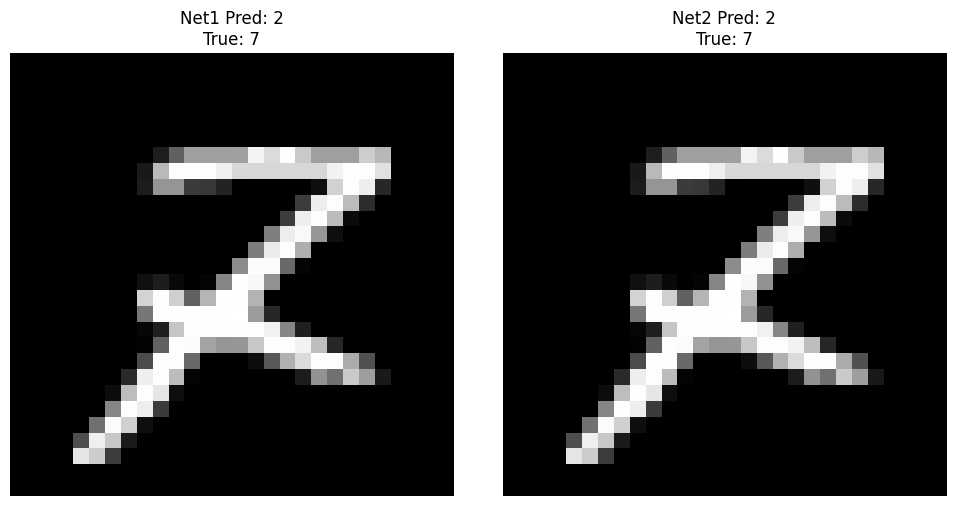

In [ ]:
# Get random sample from test set
random_idx = np.random.randint(0, len(x_test))
random_sample = x_test_flat[random_idx : random_idx + 1]

# Get predictions from both networks
predictions_1 = network_1.predict(random_sample)
predictions_2 = network_cnn.predict(random_sample)

print("Prediction probabilities for random test image:")
print(f"Digit 0: Net1 {predictions_1[0][0]:.4%}, Net2 {predictions_2[0][0]:.4%}")
print(f"Digit 1: Net1 {predictions_1[0][1]:.4%}, Net2 {predictions_2[0][1]:.4%}")
print(f"Digit 2: Net1 {predictions_1[0][2]:.4%}, Net2 {predictions_2[0][2]:.4%}")
print(f"Digit 3: Net1 {predictions_1[0][3]:.4%}, Net2 {predictions_2[0][3]:.4%}")
print(f"Digit 4: Net1 {predictions_1[0][4]:.4%}, Net2 {predictions_2[0][4]:.4%}")
print(f"Digit 5: Net1 {predictions_1[0][5]:.4%}, Net2 {predictions_2[0][5]:.4%}")
print(f"Digit 6: Net1 {predictions_1[0][6]:.4%}, Net2 {predictions_2[0][6]:.4%}")
print(f"Digit 7: Net1 {predictions_1[0][7]:.4%}, Net2 {predictions_2[0][7]:.4%}")
print(f"Digit 8: Net1 {predictions_1[0][8]:.4%}, Net2 {predictions_2[0][8]:.4%}")
print(f"Digit 9: Net1 {predictions_1[0][9]:.4%}, Net2 {predictions_2[0][9]:.4%}")
print(
    f"\nPredicted digits: Net1: {np.argmax(predictions_1[0])}, Net2: {np.argmax(predictions_2[0])}"
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[random_idx].reshape(28, 28), cmap="gray")
plt.title(f"Net1 Pred: {predicted_classes_1[random_idx]}\nTrue: {y_test[random_idx]}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(x_test[random_idx].reshape(28, 28), cmap="gray")
plt.title(f"Net2 Pred: {predicted_classes_2[random_idx]}\nTrue: {y_test[random_idx]}")
plt.axis("off")

plt.tight_layout()
plt.show()